# Курсовой проект для курса "Python для Data Science"

## Подключаем необходимые библиотеки

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams

%matplotlib inline

## Выгружаем данные по исследуемым обьектам

In [18]:
train = pd.read_csv('Data/train.csv')

## Проводим первичный анализ данных.

In [19]:
train.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [20]:
train.shape

(10000, 20)

In [21]:
train.info()
print(train['Ecology_2'].value_counts())
print(train['Ecology_3'].value_counts())
print(train['Shops_2'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [22]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### В данном датасете 10000 строк с данными.

### Числовых значений, которые не могут быть применимы к данным и явных выбросов, не наблюдается
### Колонки "LifeSquare" и "Healthcare_1" не заполенены полностью (7887 и 5202 позиций), их необходимо дозаполнить
### Колонки "Ecology_2", "Ecology_3", "Shops_2" имеют тип данных object, который мы не можем использовать, их необходимо преобразовать в числовой тип данных
### Колонка "Price" отражает целевую переменную для этих данных  

## Производим обработку данных, для последующей работы с ними
    * Выносим целевую переменную из датасета в train_y
    * Дополняем строки имеющие пропуски медианным значением
    * Строки имеющие тип object принимают 2 значения 'A' либо 'В' мы можем преобразовать их в числовые, где А = 1, В = 0. 
    * Исключаем из датасета целевую переменную и строки с типом object
    * Проверяем получившийся в результате обработки датасет

In [23]:
train_y = train['Price']
train["LifeSquare"] = train["LifeSquare"].fillna(train["LifeSquare"].median())
train["Healthcare_1"] = train["Healthcare_1"].fillna(train["Healthcare_1"].median())
#train.loc[train['Ecology_2'] == 'A', 'Ecology_2_1'] = 1
#train.loc[train['Ecology_3'] == 'A', 'Ecology_3_1'] = 1
#train.loc[train['Shops_2'] == 'A', 'Shops_2_1'] = 1
#train[['Ecology_2_1','Ecology_3_1','Shops_2_1']] = train[['Ecology_2_1','Ecology_3_1','Shops_2_1']].fillna(0)
train = train.drop(['Price','Ecology_2','Ecology_3','Shops_2'],axis = 1)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Social_1       10000 non-null  int64  
 11  Social_2       10000 non-null  int64  
 12  Social_3       10000 non-null  int64  
 13  Healthcare_1   10000 non-null  float64
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
dtypes: float64(7), int64(9)
memory usage: 1.2 MB


### Приступаем к постройке модели на полученных данных.

In [24]:
x_train, x_test, y_train, y_test = train_test_split(train, train_y, test_size=0.25)

lr = LinearRegression()
lr1 = LinearRegression()
scaler = StandardScaler()

lr.fit(x_train,y_train)

train_scaled = scaler.fit_transform(x_train)
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
test_scaled = scaler.fit_transform(x_test)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

lr1.fit(train_scaled,y_train)

LinearRegression()

### Приступаем к оценке качества полученной модели
   
   #### Сперва проверим работу модели на наших данных, которые до жтого были разделены на 2 части

In [25]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr1.predict(test_scaled)

pred = pd.DataFrame({'normal_pred':y_pred_scaled, 'not_normal_pred':y_pred,"real_value":y_test})
pred['not_normalized_data_error'] = pred['not_normal_pred'] - pred["real_value"]
pred['normalized_data_error'] = pred['normal_pred'] - pred["real_value"]
pred.head(15)

,normal_pred,not_normal_pred,real_value,not_normalized_data_error,normalized_data_error
7963,223076.633174,215002.009558,192330.703072,22671.306486,30745.930103
8164,201076.027677,206217.625867,189407.427829,16810.198038,11668.599848
1320,221072.339945,236814.942180,260835.768399,-24020.826219,-39763.428453
9690,192540.241031,188986.077150,192467.695769,-3481.618619,72.545262
508,157340.823764,151360.519400,109463.907995,41896.611405,47876.915769
1629,256373.674373,268553.956549,286353.072967,-17799.116418,-29979.398593
205,206355.920170,218890.540525,183038.511217,35852.029308,23317.408953
1818,206069.259159,197403.151383,163489.319536,33913.831847,42579.939623
2355,188349.412586,179995.199985,174776.031667,5219.168318,13573.380918
6866,199687.468042,210974.762659,179678.146778,31296.615881,20009.321264


<function matplotlib.pyplot.show(close=None, block=None)>

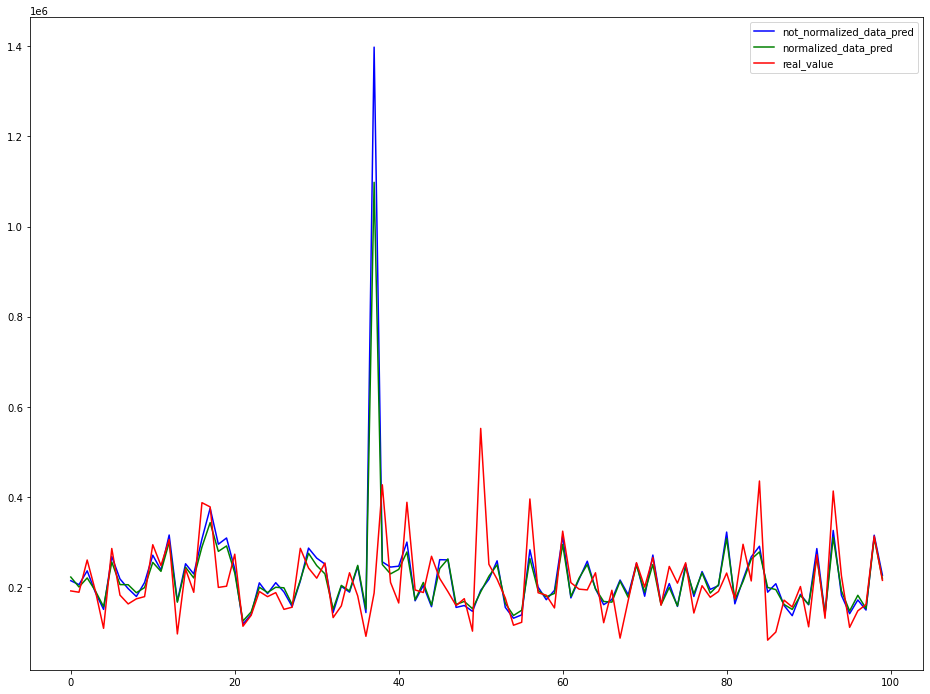

In [26]:
rcParams["figure.figsize"] = 16, 12

x = np.arange(100)
y1 = y_pred[0:100]
y2 = y_pred_scaled[0:100]
y3 = y_test[0:100]

plt.plot(x,y1, label = 'not_normalized_data_pred', color = 'blue')
plt.plot(x,y2, label = 'normalized_data_pred',color = 'green')
plt.plot(x,y3, label = 'real_value',color = 'red')

plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

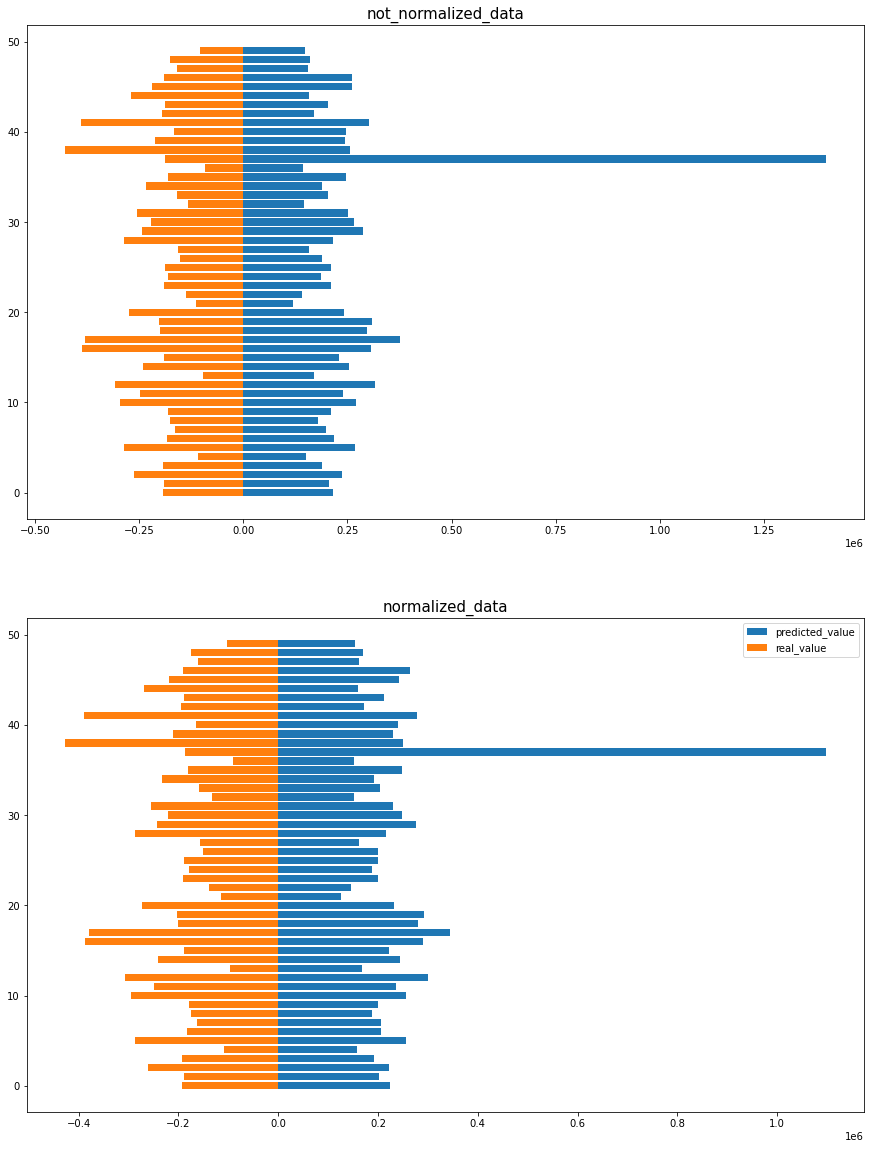

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=1)

fig.set_size_inches(15, 20)
line1 = ax[0].barh(np.arange(50), y_pred[0:50])
line1.set_label('predicted_value')
line2 = ax[0].barh(np.arange(50), (y_test[0:50] * -1))
line2.set_label('real_value')
line3 = ax[1].barh(np.arange(50), y_pred_scaled[0:50])
line3.set_label('predicted_value')
line4 = ax[1].barh(np.arange(50), (y_test[0:50] * -1))
line4.set_label('real_value')
ax[0].set_title('not_normalized_data', size = 15)
ax[1].set_title('normalized_data', size = 15)
plt.legend()


plt.show

In [28]:
mean_squared_error(pred['normal_pred'],pred['real_value'])

5535672530.123174

In [29]:
mean_squared_error(pred['not_normal_pred'],pred['real_value'])

6140787440.288589

In [30]:
mean_absolute_error(pred['normal_pred'],pred['real_value'])

48294.31556946239

In [31]:
mean_absolute_error(pred['not_normal_pred'],pred['real_value'])

48250.92173635136

In [32]:
r2_score(pred['real_value'],pred['not_normal_pred'])

0.26455990880219504

In [33]:
r2_score(pred['real_value'],pred['normal_pred'])

0.3370303808783772

In [335]:
xxx = pd.read_csv('Downloads/project_task/project_task/train.csv')

xxx_y = xxx['Price']
xxx["LifeSquare"] = xxx["LifeSquare"].fillna(xxx["LifeSquare"].median())
xxx["Healthcare_1"] = xxx["Healthcare_1"].fillna(xxx["Healthcare_1"].median())
xxx.loc[xxx['Ecology_2'] == 'A', 'Ecology_2_1'] = 1
xxx.loc[xxx['Ecology_3'] == 'A', 'Ecology_3_1'] = 1
xxx.loc[xxx['Shops_2'] == 'A', 'Shops_2_1'] = 1
xxx[['Ecology_2_1','Ecology_3_1','Shops_2_1']] = xxx[['Ecology_2_1','Ecology_3_1','Shops_2_1']].fillna(0)
xxx = xxx.drop(['Price','Ecology_2','Ecology_3','Shops_2'],axis = 1)
xxx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Social_1       10000 non-null  int64  
 11  Social_2       10000 non-null  int64  
 12  Social_3       10000 non-null  int64  
 13  Healthcare_1   10000 non-null  float64
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Ecology_2_1    10000 non-null  float64
 17  Ecology_3_1    10000 non-null  float64
 18  Shops_2

In [336]:
xxx_norm = scaler.fit_transform(xxx)
xxx_norm = pd.DataFrame(xxx_norm, columns=xxx.columns)

In [337]:
xxx_pred = lr.predict(xxx)
xxx_norm_pred = lr1.predict(xxx_norm)

pred1 = pd.DataFrame({'xxx_pred':xxx_pred, 'xxx_norm_pred':xxx_norm_pred,"real_value":xxx_y})
pred1

,xxx_pred,xxx_norm_pred,real_value
0,183534.192974,182642.454931,184966.930730
1,259999.745236,256809.822467,300009.450063
2,199537.703063,199033.049829,220925.908524
3,191751.434833,191135.585998,175616.227217
4,220172.234975,221544.656893,150226.531644
...,...,...,...
9995,212868.393879,211194.556297,196684.316040
9996,137425.374497,142195.561854,189050.289571
9997,120813.617224,126770.930604,159143.805370
9998,205188.088878,203324.465272,181595.339808


<function matplotlib.pyplot.show(close=None, block=None)>

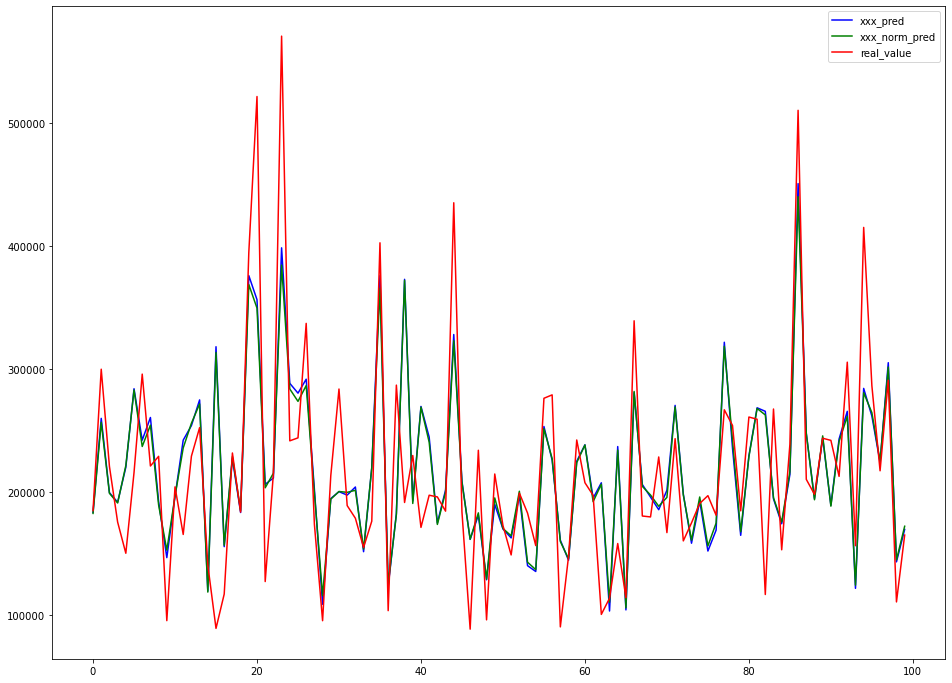

In [338]:
rcParams["figure.figsize"] = 16, 12

x = np.arange(100)
y1 = xxx_pred[0:100]
y2 = xxx_norm_pred[0:100]
y3 = xxx_y[0:100]

plt.plot(x,y1, label = 'xxx_pred', color = 'blue')
plt.plot(x,y2, label = 'xxx_norm_pred',color = 'green')
plt.plot(x,y3, label = 'real_value',color = 'red')

plt.legend()

plt.show

In [339]:
r2_score(pred1['real_value'],pred1['xxx_pred'])

-101567.38790934878

In [340]:
r2_score(pred1['real_value'],pred1['xxx_norm_pred'])

0.4760990482975389